# INF2178 A4-Yixin Chang (1005991651)

### Load the dataset

In [296]:
# Student ID: 1005991651
# Student name: Yixin Chang
# Course code: INF2178

# Assignment 4

# import stuff here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pingouin
import pingouin as pg

In [297]:
# Load data and head data
df=pd.read_csv("INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


### Examine and clean the dataset

In [298]:
# Drop specified columns that will not be used
df = df.drop(['Unnamed: 0', 'MRI ID', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'CDR', 'eTIV', 'nWBV', 'ASF'], axis=1)
df.head()

,Subject ID,Group,Visit,MMSE
0,OAS2_0001,Nondemented,1,27.0
1,OAS2_0001,Nondemented,2,30.0
2,OAS2_0002,Demented,1,23.0
3,OAS2_0002,Demented,2,28.0
4,OAS2_0004,Nondemented,1,28.0


In [299]:
# Check if there are any missing values in the entire DataFrame
if df.isna().values.any():
    print("There are missing values in the DataFrame.")
    # check for missing values in the DataFrame
    missing_values = df.isna().sum()
    # display the count of missing values for each column
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.
Subject ID    0
Group         0
Visit         0
MMSE          1
dtype: int64


In [300]:
# Fill missing MMSE values with mean
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)

# Check again
# Check if there are any missing values in the entire DataFrame
if df.isna().values.any():
    print("There are missing values in the DataFrame.")
    # check for missing values in the DataFrame
    missing_values = df.isna().sum()
    # display the count of missing values for each column
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   Group       294 non-null    object 
 2   Visit       294 non-null    int64  
 3   MMSE        294 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.3+ KB


### EDA

In [302]:
df['MMSE'].describe()

count    294.000000
mean      27.259386
std        3.407624
min       15.000000
25%       26.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

<ipython-input-303-7c5e0e139264>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(A, bins=bins, label='Nondemented')
<ipython-input-303-7c5e0e139264>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(B, bins=bins, label='Demented')
<ipython-input-303-7c5e0e139264>:24: UserWarning: 


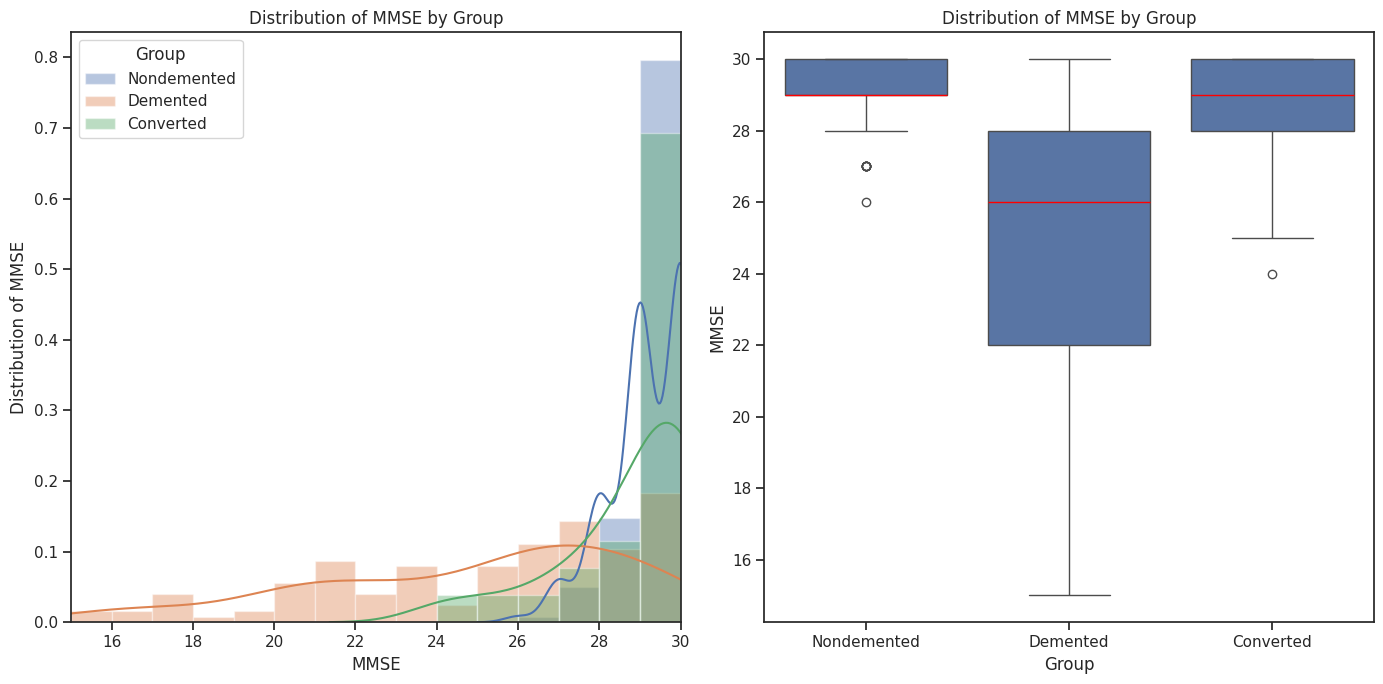

In [303]:
import numpy as np
import matplotlib as plt
%matplotlib inline

# View distribution of MMSE by Group

plt.pyplot.figure(figsize=(14, 7))

sns.set(style="ticks")

# The range of MMSE: 0-30
bins = np.arange(0, 31, 1)

plt.pyplot.subplot(1, 2, 1)

A = df[df['Group'] == 'Nondemented']['MMSE'].values
B = df[df['Group'] == 'Demented']['MMSE'].values
C = df[df['Group'] == 'Converted']['MMSE'].values

# Histogram for MMSE by 'Group'
# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A, bins=bins, label='Nondemented')
ax2 = sns.distplot(B, bins=bins, label='Demented')
ax3 = sns.distplot(C, bins=bins, label='Converted')

plt.pyplot.xlabel('MMSE')
plt.pyplot.ylabel('Distribution of MMSE')
plt.pyplot.legend(title='Group')
plt.pyplot.title('Distribution of MMSE by Group')
# MMSE min is 15, MMSE max is 30 in the dataset
plt.pyplot.xlim(15, 30)

# Boxplot for MMSE by 'Group'
plt.pyplot.subplot(1, 2, 2)
sns.boxplot(x='Group', y='MMSE', data=df, medianprops={'color': 'red'})
plt.pyplot.title('Distribution of MMSE by Group')

plt.pyplot.tight_layout()
plt.pyplot.show()

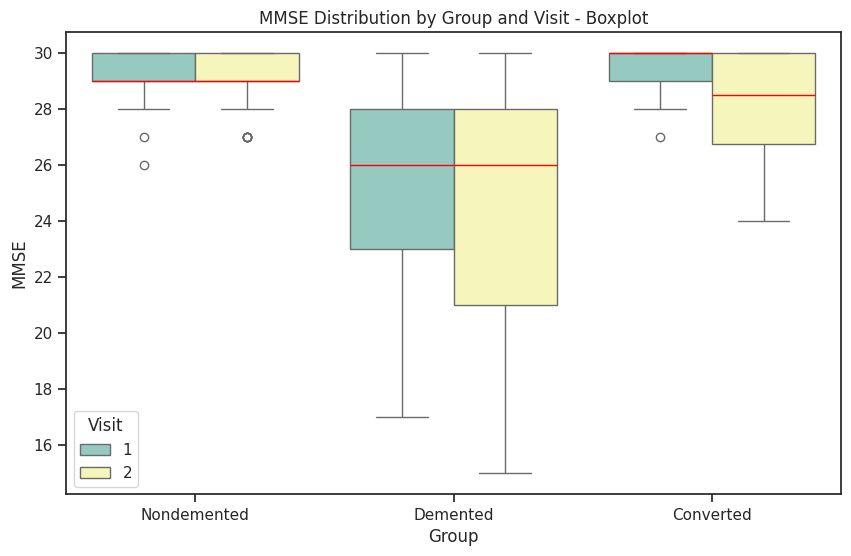

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate boxplots to see MMSE distribution by Group and Visit.

plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="MMSE", hue="Visit",data=df, palette="Set3", medianprops={'color': 'red'})
plt.title('MMSE Distribution by Group and Visit - Boxplot')
plt.show()

In [305]:
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.29  4.38
      Nondemented  29.11  0.96

<ipython-input-306-b8d61b6691c9>:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True, markers=['o', 's', '^'],


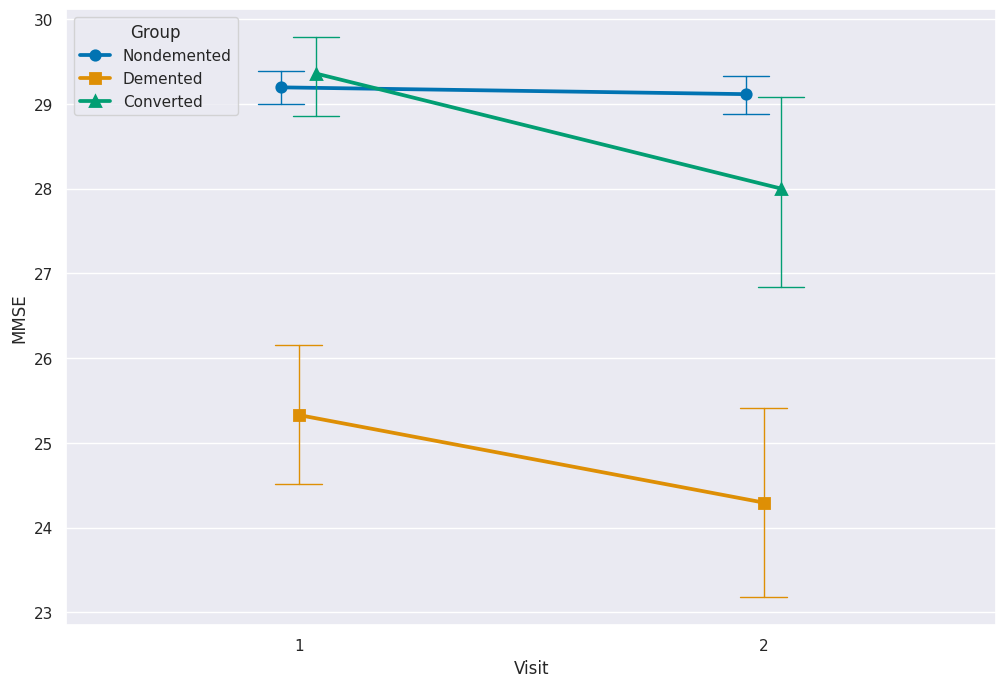

In [306]:
# Point Plot

plt.figure(figsize=(12, 8))

sns.set()
sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True, markers=['o', 's', '^'],
	      capsize=.1, errwidth=1, palette='colorblind')

plt.legend(loc='upper left', title='Group')
plt.show()

### Mixed Effects ANOVA

In [307]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1322.017      2    141  661.009  56.100    0.000  0.443  nan
Visit          21.528      1    141   21.528   8.525    0.004  0.057    1.000
Interaction    16.204      2    141    8.102   3.208    0.043  0.044  nan



In [308]:
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.876  143.000  two-sided        0.005               4.793     0.159
Group          -        Converted  Demented     False     True           6.745   50.480  two-sided        0.000         2189000.000     1.164
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.512   65.514  two-sided        0.000  33060000000000.000    -1.745
Visit * Group  1        Converted  Demented     False     True           8.076   60.165  two-sided        0.000       447900000.000

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [309]:
#checking assumptions

#mauchly's test of spericity
pg.sphericity(data=df, dv='MMSE', subject='Subject ID', within='Visit')[-1]

1.0

In [310]:
#test of normality
pg.normality(data=df, dv='MMSE', group='Visit')

,W,pval,normal
Visit,,,
1,0.787462,1.761304e-13,False
2,0.761121,4.941331e-14,False


In [311]:
# Levene's test for homogeneity of variances
levene_results = pg.homoscedasticity(data=df, dv='MMSE', group='Group', method='levene')

levene_results

,W,pval,equal_var
levene,64.643002,5.897159e-24,False


### Power Test

In [312]:
# statistical power for t-tests
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# factors for power analysis
alpha = 0.05
power = 0.91
d = 0.7

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 45.451


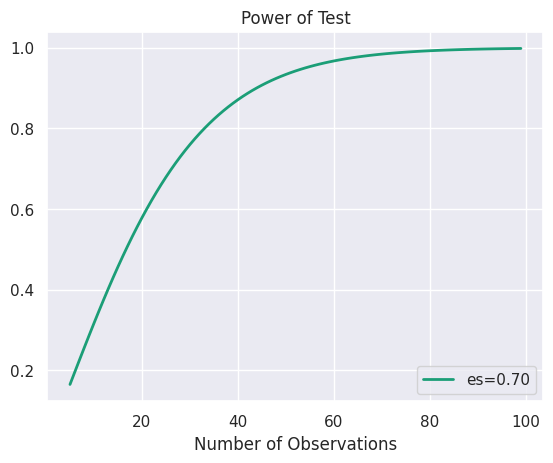

In [313]:
#power curves
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# power analysis varying parameters
effect_sizes = np.array([d])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()